## Module 2 - Data Insights and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
%matplotlib inline 

In [2]:
# Read the data:
customer_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerDemographic")
trans = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "Transactions")
new_custs = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "NewCustomerList")
address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerAddress")

### Data Preprocessing 

In [3]:
# Take a look at the datasets:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [4]:
# Create the Age column and make bucket to group it: 
customer_demo['age'] = datetime.now().year - customer_demo['DOB'].dt.year

# Fiter out age over 100:
customer_demo = customer_demo[customer_demo['age'] <= 100]

# Summarize the age into buckets:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
customer_demo['age_bucket'] = pd.cut(customer_demo['age'], bins, labels)

In [5]:
# Make the expression of Gender to the correct format:
customer_demo.gender.unique()
customer_demo['gender'] = customer_demo['gender'].replace({'F':'Female', 'Femal':'Female', 'M':'Male', 'U':'Unknown'})

In [6]:
# Take a look at the New Customer table:
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.1875,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.9500,0.807500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.84,0.8400,0.8400,0.840000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.45,0.5625,0.5625,0.562500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.93,0.9300,1.1625,1.162500,4,4,1.703125


In [7]:
# Create the Age column and make bucket to group it: 
new_custs['age'] = datetime.now().year - new_custs['DOB'].dt.year
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
new_custs['age_bucket'] = pd.cut(new_custs['age'], bins, labels)

In [8]:
# Correct the format of gender column:
new_custs.gender = new_custs.gender.replace({'U':'Unknown'})

## Data Exploration

In [9]:
customer_demo.age.describe()

count    3912.000000
mean       42.935072
std        12.617249
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age Group Distribution of Existing Customers (in percentage)')

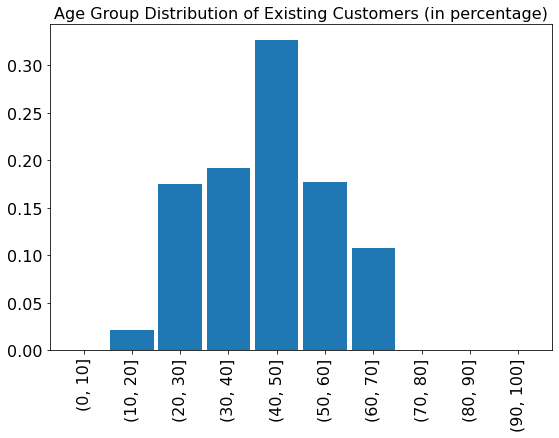

In [10]:
# Age Distribution
customer_demo.age_bucket.value_counts(sort = False, normalize = True).plot(kind = 'bar', figsize = (9,6), width = 0.9, fontsize = 16)
plt.title("Age Group Distribution of Existing Customers (in percentage)", fontsize = 16)

Text(0.5, 1.0, 'Age Group Distribution of New Customers (in percentage)')

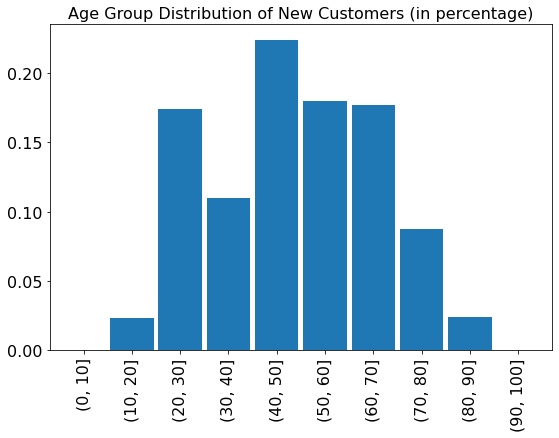

In [11]:
new_custs.age_bucket.value_counts(sort = False, normalize = True).plot(kind = 'bar', figsize = (9,6), width = 0.9, fontsize = 16)
plt.title("Age Group Distribution of New Customers (in percentage)", fontsize = 16)

Compared with the existing customer population which the bulk of group in the 40-50 age stage, the distribution of new customers age group is flatter and the most of them are gathering at 20 - 60 age stages. 

Text(0.5, 1.0, 'Gender Distribution of Existing Customers')

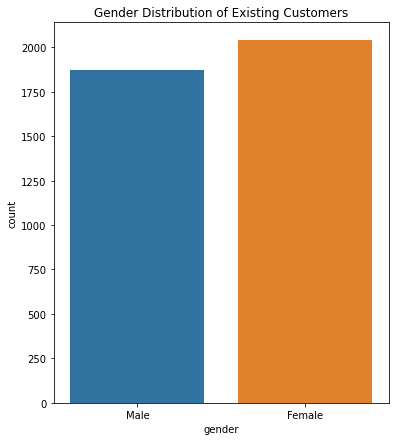

In [12]:
# Take a look at the difference between the Gender groups of the old and new customers:
plt.figure(figsize = (6,7))
sns.countplot(x = 'gender', data = customer_demo)
plt.title("Gender Distribution of Existing Customers")

Text(0.5, 1.0, 'Age and Gender Distribution of Existing Customers')

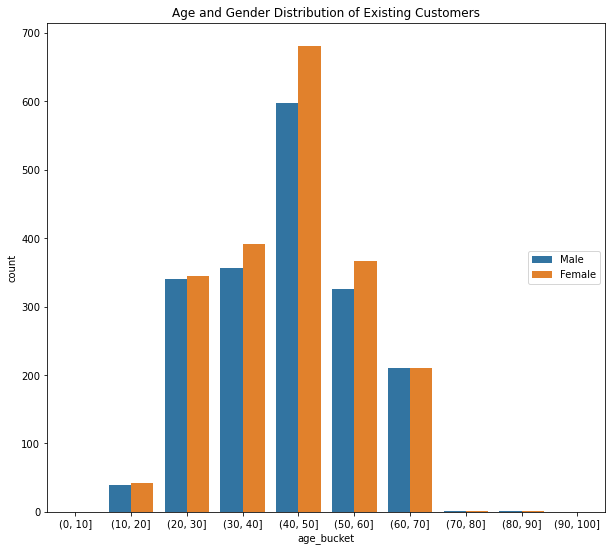

In [13]:
plt.figure(figsize = (10,9))
sns.countplot(x = 'age_bucket', hue = 'gender', data = customer_demo)
plt.legend(loc = 5)
plt.title("Age and Gender Distribution of Existing Customers")

Text(0.5, 1.0, 'Gender Distribution of New Customers')

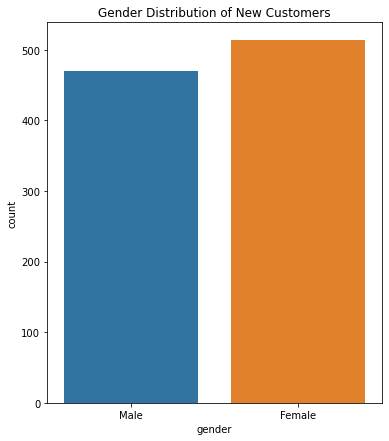

In [14]:
plt.figure(figsize = (6,7))
sns.countplot(x = 'gender', data = new_custs[new_custs['gender'] != 'Unknown'])
plt.title("Gender Distribution of New Customers")

Text(0.5, 1.0, 'Age and Gender Distribution of New Customers')

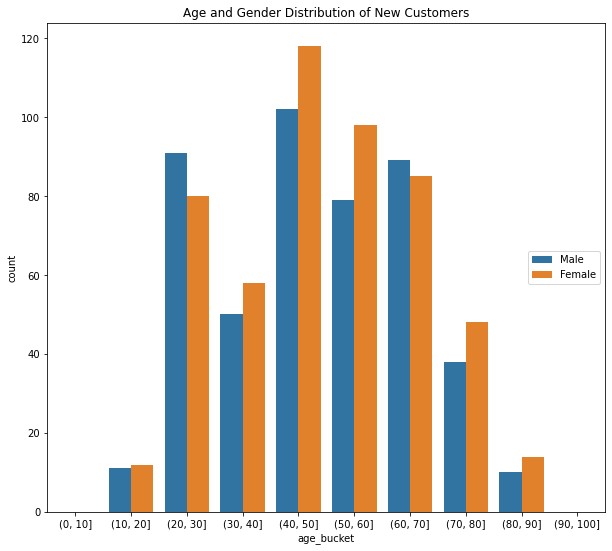

In [15]:
plt.figure(figsize = (10,9))
sns.countplot(x = 'age_bucket', hue = 'gender', data = new_custs[new_custs['gender'] != 'Unknown'])
plt.legend(loc = 5)
plt.title("Age and Gender Distribution of New Customers")

There are more Female customers than Male customers in both of the old and new customer groups. From the joint distribution of Age and Gender of New Customers, we can find that there are more male customers than females in 20-30 and 60-70 age groups, which indicates that we could do more ads on males in the two groups. For the rest of age groups, more female-focused ads activities could be more effective. 

In [16]:
# Compare the purchasing frequency of age buckets between genders: 
customer_demo.groupby(['gender','age_bucket'])['past_3_years_bike_related_purchases'].mean()

gender  age_bucket
Female  (0, 10]             NaN
        (10, 20]      46.000000
        (20, 30]      49.037681
        (30, 40]      50.252551
        (40, 50]      48.223201
        (50, 60]      48.530055
        (60, 70]      42.933649
        (70, 80]      93.000000
        (80, 90]      56.000000
        (90, 100]           NaN
Male    (0, 10]             NaN
        (10, 20]      46.775000
        (20, 30]      51.458824
        (30, 40]      50.338936
        (40, 50]      49.373534
        (50, 60]      48.524540
        (60, 70]      51.038095
        (70, 80]      32.500000
        (80, 90]      67.000000
        (90, 100]           NaN
Name: past_3_years_bike_related_purchases, dtype: float64

From the mean values of the past 3 years bike related purchases grouped by gender and their age groups, we can find that Male customers seems have higher purchase frequencies than female customers, especially in the middle age groups. This shows that we could consider to post more activities to enhance the new customers' loyalty and increase their re-purchase chances in the future times.

Text(0.5, 1.0, 'Job Category Distribution of Existing Customers')

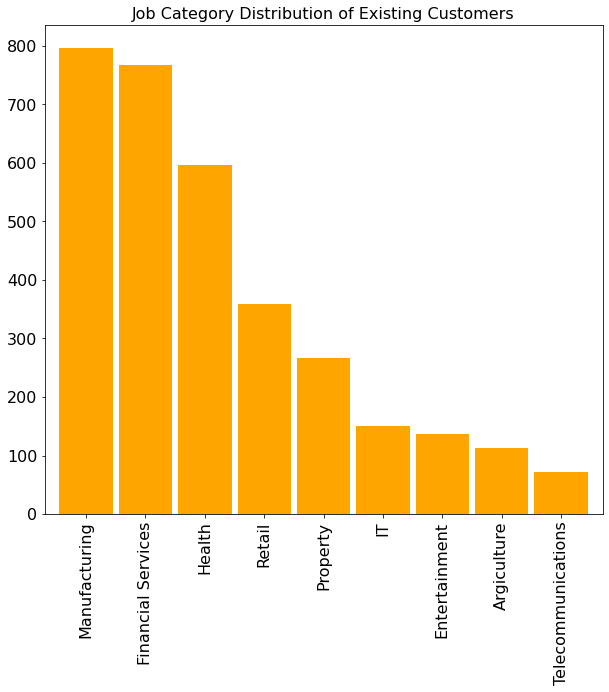

In [17]:
# Job Industry Categories Visualization:
plt.figure(figsize = (10,9))
customer_demo['job_industry_category'].value_counts().plot(kind = 'bar', width = 0.9, fontsize = 16, color = 'orange')
plt.title("Job Category Distribution of Existing Customers", fontsize = 16)

Text(0.5, 1.0, 'Job Category Distribution of New Customers')

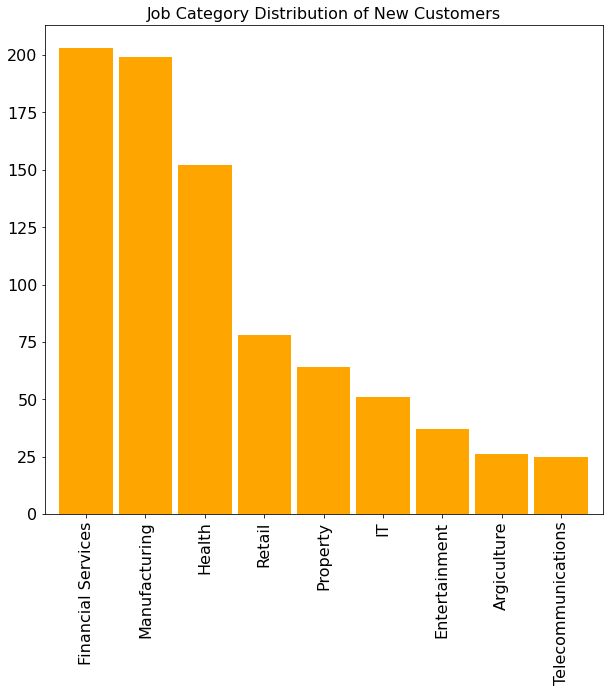

In [18]:
plt.figure(figsize = (10,9))
new_custs['job_industry_category'].value_counts().plot(kind = 'bar', width = 0.9, fontsize = 16, color = 'orange')
plt.title("Job Category Distribution of New Customers", fontsize = 16)

The top 3 categories our customers are in are Manufacturing, Financial Services and Health. This could be explained by work-related factors such as physical/mental stress, income and social class. Compared with old customers, there are more customers in the financial service category, which means we could do more targeted marketing activities to those group of customers.

In [19]:
customer_demo.groupby("job_industry_category")['past_3_years_bike_related_purchases'].agg(['count','mean']).sort_values(by = 'mean', ascending = False)

,count,mean
job_industry_category,,
Argiculture,113,52.610619
Health,596,50.093960
Property,267,49.790262
IT,151,49.211921
Manufacturing,796,49.146985
Financial Services,767,48.453716
Retail,358,48.326816
Entertainment,136,46.470588
Telecommunications,72,45.055556


Even though the customers in the Manufacturing, Financial Services and Health industries are the occupcing the bulk of customer base, those in Argiculture, Health and Property showes the highest tendencies of purchase frequencies. Compared with the customer base, customers in the Health industry showes a bigger power in both population and purchase willings and could be more focused in the coming marketing strategies. 

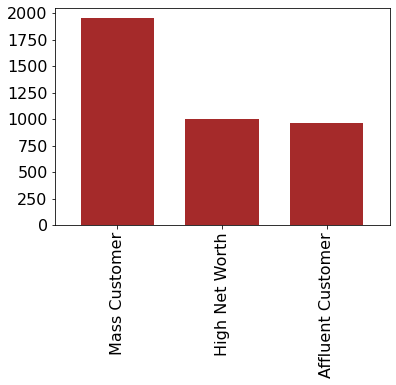

In [20]:
# Wealth outcome of old and new customers

# For old customers:
customer_demo.wealth_segment.value_counts().plot(kind = 'bar', fontsize = 16, color = 'brown', width = 0.7)

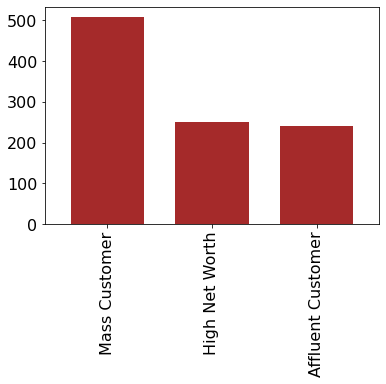

In [21]:
# For New Customers:
new_custs.wealth_segment.value_counts().plot(kind = 'bar', fontsize = 16, color = 'brown', width = 0.7)

Most of the customers are in the Mass group. Now let's plot it again with Age and Gender groups for the new customers.

Text(0.5, 1.0, 'Age and wealth class distributions of New Customers')

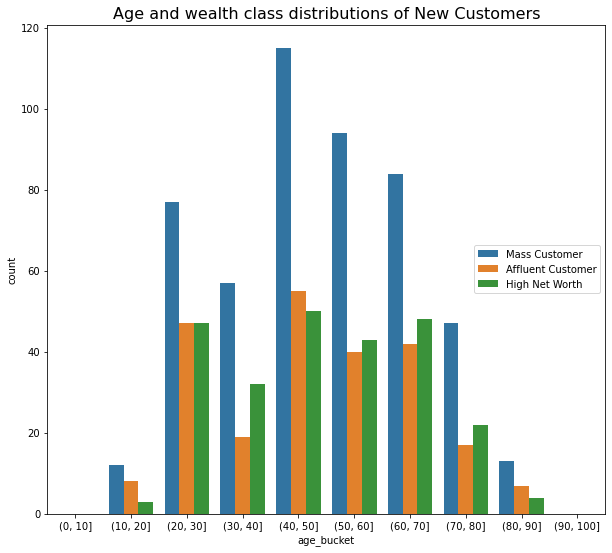

In [22]:
# Age and wealth class distributions: 
plt.figure(figsize = (10,9))
sns.countplot(x = 'age_bucket', data = new_custs, hue = 'wealth_segment')
plt.legend(loc = 5)
plt.title("Age and wealth class distributions of New Customers", fontsize = 16)

Text(0.5, 1.0, 'Gender and wealth class distributions of New Customers')

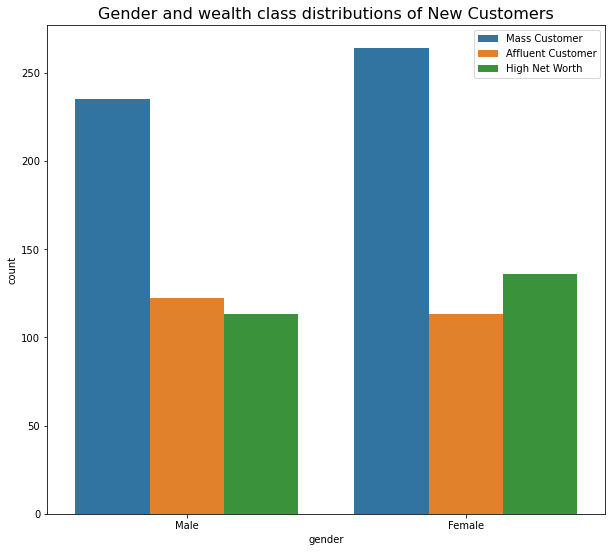

In [23]:
# Gender and wealth class distributions:
plt.figure(figsize = (10,9))
sns.countplot(x = 'gender', data = new_custs[new_custs.gender != 'Unknown'], hue = 'wealth_segment')
plt.legend(loc = 1)
plt.title("Gender and wealth class distributions of New Customers", fontsize = 16)

Text(0.5, 1.0, 'Wealth Class and Location distribution of New Customers')

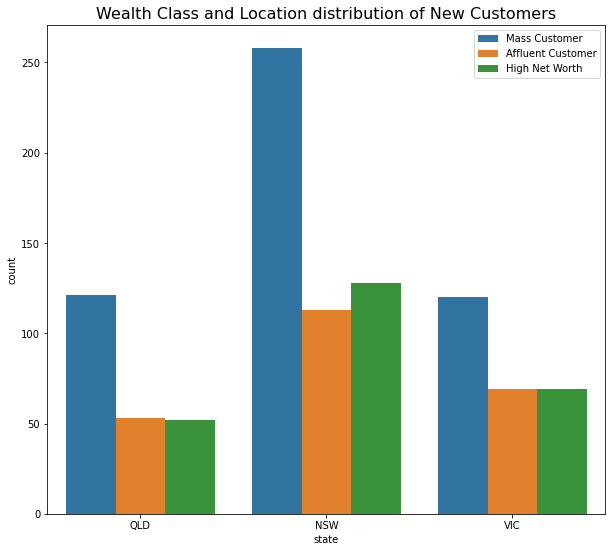

In [24]:
# States distribution for New Customers:
plt.figure(figsize = (10,9))
sns.countplot(x = 'state', data = new_custs[new_custs.gender != 'Unknown'], hue = 'wealth_segment')
plt.legend(loc = 1)
plt.title("Wealth Class and Location distribution of New Customers", fontsize = 16)

From the above plots, it's clear that the mass customers are the majority of the total customer population across age, gender and locations. This indicates that the Mass Customer Group should be focused when we design our marketing strategies in the future. For location level, since the majority of new customers are coming from the NSW state, we should consider setting more marketing campaigns or activities toward this state compared with the other locations. 

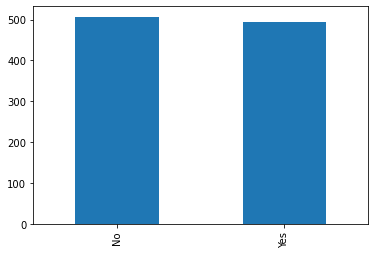

In [25]:
# Owns Car
new_custs.owns_car.value_counts().plot(kind = 'bar')

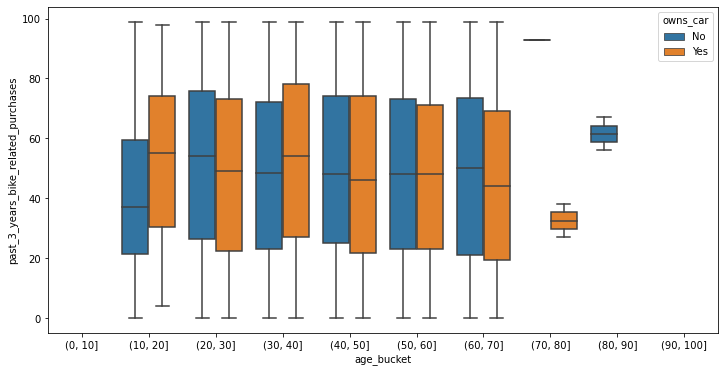

In [26]:
# Take a look at the relationship between the car's ownership status with purchase frequency by Age Buckets for old customers:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'age_bucket', y = 'past_3_years_bike_related_purchases', data = customer_demo, hue = 'owns_car')

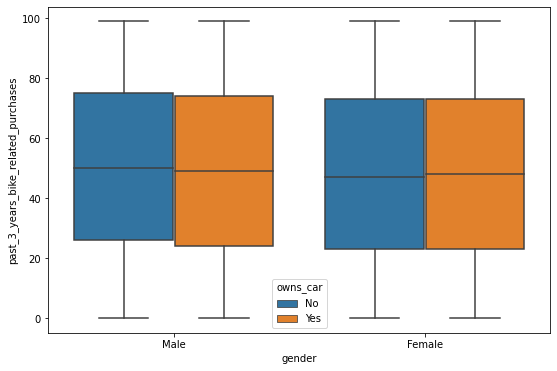

In [27]:
# Take a look at the relationship between the car's ownership status with purchase frequency by Genders for old customers:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'gender', y = 'past_3_years_bike_related_purchases', data = customer_demo, hue = 'owns_car')

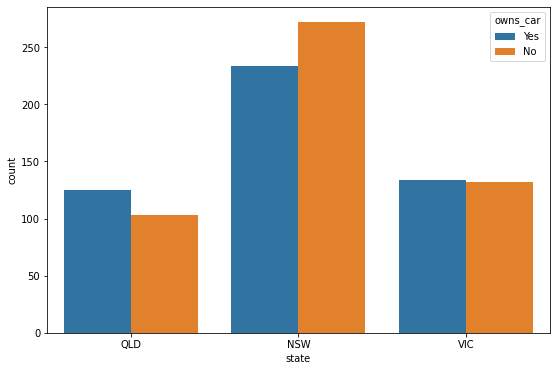

In [28]:
# Car's ownership status by States of New Customers:
plt.figure(figsize = (9,6))
sns.countplot(x = 'state', data = new_custs, hue = 'owns_car')

In summary for the plots, there are slightly more customers without car than those own their car in the new customers. Customers in early to middle ages who owns car (20 - 40s) tend to have higher puchasing rates than those do not have car. And for new customers in the NSW state, there are more of them do not own their car compared with those in QLD and VIC state, which could guide our marketing activities toward them. 

In [29]:
# Data Exploration to the Transaction Data
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Text(0.5, 1.0, 'Hot Saling Brands')

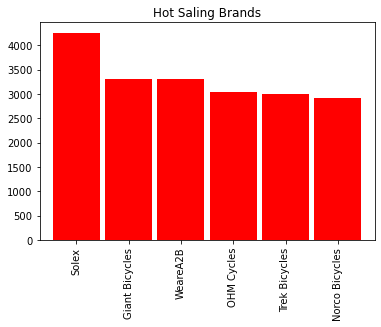

In [30]:
# Hot saling brands:
trans.brand.value_counts().plot(kind = 'bar', width = 0.9, color = 'red')
plt.title('Hot Saling Brands')

Text(0.5, 1.0, 'Sales Counts for Product Line and Classes')

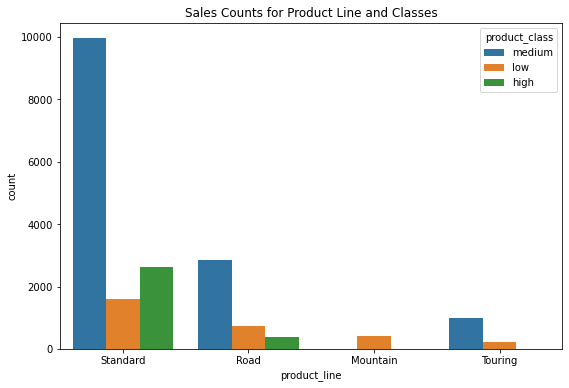

In [31]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'product_line', hue = 'product_class', data = trans)
plt.title("Sales Counts for Product Line and Classes")

Text(0.5, 1.0, 'Sales Counts for Product Size and Classes')

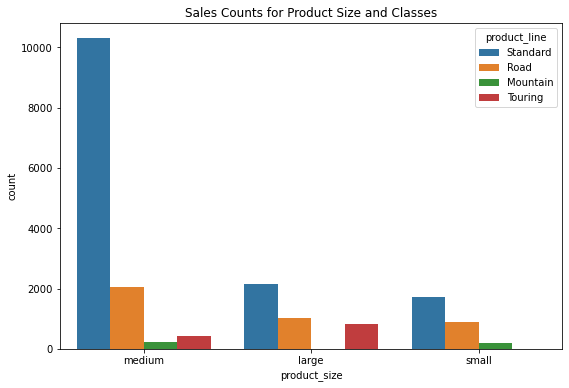

In [32]:
# Product Size Distribution:
plt.figure(figsize = (9,6))
sns.countplot(x = 'product_size', hue = 'product_line', data = trans)
plt.title("Sales Counts for Product Size and Classes")

From the plots, we can summarize that Solex is the most popular brand, and the marjority of products sold are Midium sized, with the Standard type in product line. This shows the marketing team should focus more on the promotion of Medium sized and Standard type products.

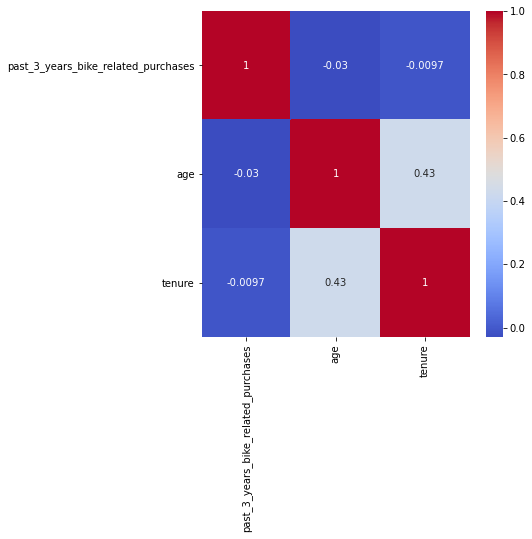

In [39]:
# Correlation between all the numeric variables:
cols = ['past_3_years_bike_related_purchases', 'age','tenure']
corrs = customer_demo[cols].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrs, annot = True, cmap= 'coolwarm')

The three numeric variables (purchase frequency, age, tenure) do not have strong correlation to each other.

In [40]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [46]:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_bucket
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,89.0,"(80, 90]"
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0,"(80, 90]"
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,80.0,"(70, 80]"
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0,"(70, 80]"
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,76.0,"(70, 80]"


In [47]:
# Calculate product profit and profit ratio and merge the customer demo and transaaction data together
trans['profit'] = trans['list_price'] - trans['standard_cost']
trans['profit_ratio'] = trans['profit']/trans['list_price']

customer_trans = pd.merge(customer_demo, trans, on = 'customer_id', how = 'left')
customer_agg = customer_trans.groupby(['customer_id', 'first_name', 'last_name'], 
                                      as_index = False).agg({'list_price':'sum','standard_cost':'sum','profit':'sum','profit_ratio':'mean'})

In [51]:
# Save the transformed datasets as csv files:
customer_demo.to_csv("customer_demo.csv", index = False)
trans.to_csv("transactions.csv", index = False)
new_custs.to_csv("new_customers.csv", index = False)
customer_agg.to_csv("customer_agg.csv", index = False)